In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('SF data summary backfiled.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,200.468634,5.93,55702,4149.607,5.1,284589.379,798.882,40.30%,357406,0.30%,1201,2.90,182.9
1,4/1/2005,202.308244,5.86,60712,4162.783,4.7,302385.828,798.882,40.30%,364189,0.30%,1239,3.01,182.9
2,5/1/2005,204.821172,5.72,60712,4162.783,4.5,302385.828,798.882,40.30%,364189,0.30%,1304,2.58,180.6
3,6/1/2005,207.194994,5.58,60712,4162.783,4.9,302385.828,798.882,40.30%,364189,0.30%,1345,3.00,180.6
4,7/1/2005,209.307840,5.70,60712,4162.783,5.0,302385.828,798.882,40.10%,367957,0.30%,1337,3.20,183.4
5,8/1/2005,210.714812,5.82,60712,4162.783,4.8,302385.828,798.882,40.10%,367957,0.30%,1271,3.19,183.4
6,9/1/2005,212.697917,5.77,60712,4162.783,4.7,302385.828,798.882,40.10%,367957,0.30%,2150,3.34,187.2
7,10/1/2005,214.124946,6.07,60712,4162.783,4.6,302385.828,798.882,40.20%,375275,0.30%,936,3.54,187.2
8,11/1/2005,215.514527,6.33,60712,4162.783,4.7,302385.828,798.882,40.20%,375275,0.30%,1673,3.95,183.1
9,12/1/2005,216.413650,6.27,60712,4162.783,4.1,302385.828,798.882,40.20%,375275,0.30%,1228,4.28,183.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,200.468634,5.93,55702,4149.607,5.1,284589.379,798.882,357406,1201,2.90,182.9,40.3,0.3
1,4/1/2005,202.308244,5.86,60712,4162.783,4.7,302385.828,798.882,364189,1239,3.01,182.9,40.3,0.3
2,5/1/2005,204.821172,5.72,60712,4162.783,4.5,302385.828,798.882,364189,1304,2.58,180.6,40.3,0.3
3,6/1/2005,207.194994,5.58,60712,4162.783,4.9,302385.828,798.882,364189,1345,3.00,180.6,40.3,0.3
4,7/1/2005,209.307840,5.70,60712,4162.783,5.0,302385.828,798.882,367957,1337,3.20,183.4,40.1,0.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,55702,4149.607,5.1,284589.379,798.882,357406,1201,2.90,182.900,40.3,0.3
1,5.86,60712,4162.783,4.7,302385.828,798.882,364189,1239,3.01,182.900,40.3,0.3
2,5.72,60712,4162.783,4.5,302385.828,798.882,364189,1304,2.58,180.600,40.3,0.3
3,5.58,60712,4162.783,4.9,302385.828,798.882,364189,1345,3.00,180.600,40.3,0.3
4,5.70,60712,4162.783,5.0,302385.828,798.882,367957,1337,3.20,183.400,40.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,100236,4726.314,3.6,562155.764,715.003,375162,1582,4.20,235.803,34.7,0.5
150,3.81,100236,4726.314,3.1,562155.764,715.003,375162,906,4.48,237.011,34.7,0.5
151,3.90,100236,4726.314,3.0,562155.764,715.003,376057,1576,4.61,237.011,34.4,0.5
152,3.92,100236,4726.314,2.9,562155.764,715.003,376057,1372,4.82,236.108,34.4,0.5


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.9125,4.4300,5.8500,6.7600
Personal_Income,154.0,73296.090909,12912.699718,55702.0000,62995.0000,70428.0000,82639.0000,100236.0000
Resident_Population,154.0,4463.026591,190.168976,4149.6070,4317.8530,4455.4730,4647.9240,4726.3140
Unemployment_Rate,154.0,6.039610,2.257954,2.8000,4.2250,5.0000,8.2000,10.3000
GDP,154.0,392108.744721,85040.790805,284589.3790,318298.1580,366308.5150,452979.8750,562155.7640
Crime_Rate,154.0,771.943145,70.712444,659.6285,710.5509,776.8164,844.9603,875.6375
Median_Debt,154.0,387565.389610,19718.400180,357406.0000,370188.0000,376057.0000,405585.2500,421588.0000
New_Structures,154.0,848.733766,472.622402,136.0000,434.7500,801.0000,1236.2500,2358.0000
Economic_Conditions_Index,154.0,3.108052,3.370036,-9.4500,2.2825,4.2450,5.2425,7.0400
CPI less shelter,154.0,214.132597,16.378875,180.6000,200.7760,217.8750,229.1370,237.1070


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.362542,-1.648111,-0.416134,-1.264327,0.380963,-1.529505,0.745344,-0.061736,-1.906883,0.790575,-1.046702
1,1.051011,-0.974552,-1.578825,-0.593285,-1.055057,0.380963,-1.185511,0.825746,-0.029095,-1.906883,0.790575,-1.046702
2,0.916107,-0.974552,-1.578825,-0.681861,-1.055057,0.380963,-1.185511,0.963277,-0.156690,-2.047308,0.790575,-1.046702
3,0.781203,-0.974552,-1.578825,-0.504709,-1.055057,0.380963,-1.185511,1.050027,-0.032063,-2.047308,0.790575,-1.046702
4,0.896835,-0.974552,-1.578825,-0.460421,-1.055057,0.380963,-0.994421,1.033100,0.027284,-1.876356,0.705851,-1.046702
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,2.086311,1.384492,-1.080452,1.999594,-0.805235,-0.629026,1.551484,0.324017,1.323070,-1.581700,-0.961685
150,-0.924366,2.086311,1.384492,-1.301891,1.999594,-0.805235,-0.629026,0.121167,0.407102,1.396824,-1.581700,-0.961685
151,-0.837642,2.086311,1.384492,-1.346179,1.999594,-0.805235,-0.583637,1.538789,0.445677,1.396824,-1.708786,-0.961685
152,-0.818370,2.086311,1.384492,-1.390467,1.999594,-0.805235,-0.583637,1.107155,0.507991,1.341692,-1.708786,-0.961685


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

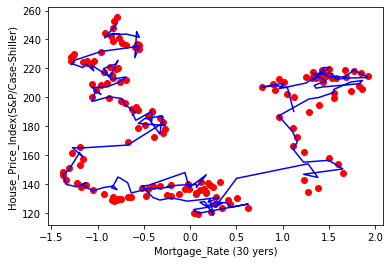

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 4.72
Accuracy: 97.1 %.


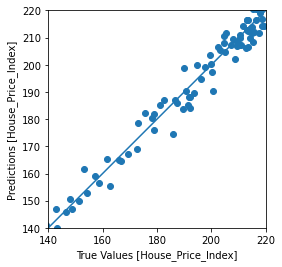

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9763746260046163

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,9.695620
1,40.029678
2,-5.467373
3,-3.829512
4,-13.156338
5,1.453177
6,10.373812
7,0.906098
8,7.044205
9,-23.443561


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[190.33724948 206.63205579 208.18114917 207.15127686 208.51437416
 209.82726246 206.08940896 209.98528003 220.38318218 220.67686709
 211.68320972 216.76266765 214.23737182 214.19743611 218.93454755
 216.57003063 213.75445178 213.30925819 212.54766218 216.51586492
 216.54236788 216.55182253 213.70737037 211.62753391 208.27217801
 206.3867074  207.25472367 209.43101982 211.67615907 210.65183201
 205.58422783 203.47137786 199.9467261  198.92049677 187.23403991
 176.19548252 169.05680873 164.47935187 155.28053251 156.57777642
 152.68869187 150.6324896  146.93501197 144.79378016 154.1766986
 144.14106167 124.3149428  127.0975955  124.49576172 122.60828304
 119.98566263 126.43708634 124.07545054 127.08447212 127.78740723
 124.8688865  127.60238312 128.21278421 118.8299597  129.73947715
 127.57469699 131.07942603 129.42985699 128.38604098 130.69803894
 129.15507983 131.03442998 138.92078906 139.27330095 148.13067581
 137.75462997 146.60357565 137.81679284 139.97665524 139.42355354
 138.514155

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,190.337249
1,206.632056
2,208.181149
3,207.151277
4,208.514374
...,...
149,243.389015
150,241.143248
151,247.232157
152,248.928951


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.362542,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,...,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311
Resident_Population,-1.648111,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,...,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492
Unemployment_Rate,-0.416134,-0.593285,-0.681861,-0.504709,-0.460421,-0.548997,-0.593285,-0.637573,-0.593285,-0.859012,...,-1.169028,-1.257603,-1.301891,-1.124740,-1.036164,-1.080452,-1.301891,-1.346179,-1.390467,-1.434755
GDP,-1.264327,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,...,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594
Crime_Rate,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,...,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235
Median_Debt,-1.529505,-1.185511,-1.185511,-1.185511,-0.994421,-0.994421,-0.994421,-0.623295,-0.623295,-0.623295,...,-0.645255,-0.661382,-0.661382,-0.661382,-0.629026,-0.629026,-0.629026,-0.583637,-0.583637,-0.583637
New_Structures,0.745344,0.825746,0.963277,1.050027,1.033100,0.893454,2.753289,0.184643,1.744027,0.802472,...,0.326405,1.259496,1.073301,3.193387,1.181210,1.551484,0.121167,1.538789,1.107155,2.444375
Economic_Conditions_Index,-0.061736,-0.029095,-0.156690,-0.032063,0.027284,0.024317,0.068827,0.128173,0.249834,0.347755,...,0.424906,0.288409,0.418971,0.478318,0.353690,0.324017,0.407102,0.445677,0.507991,0.546566
CPI less shelter,-1.906883,-1.906883,-2.047308,-2.047308,-1.876356,-1.876356,-1.644350,-1.644350,-1.894672,-1.894672,...,1.364465,1.364465,1.402685,1.402685,1.323070,1.323070,1.396824,1.396824,1.341692,1.341692


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.362542,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,-0.974552,...,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311,2.086311
2,Resident_Population,-1.648111,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,-1.578825,...,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492,1.384492
3,Unemployment_Rate,-0.416134,-0.593285,-0.681861,-0.504709,-0.460421,-0.548997,-0.593285,-0.637573,-0.593285,...,-1.169028,-1.257603,-1.301891,-1.124740,-1.036164,-1.080452,-1.301891,-1.346179,-1.390467,-1.434755
4,GDP,-1.264327,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,-1.055057,...,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594,1.999594
5,Crime_Rate,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,0.380963,...,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235,-0.805235
6,Median_Debt,-1.529505,-1.185511,-1.185511,-1.185511,-0.994421,-0.994421,-0.994421,-0.623295,-0.623295,...,-0.645255,-0.661382,-0.661382,-0.661382,-0.629026,-0.629026,-0.629026,-0.583637,-0.583637,-0.583637
7,New_Structures,0.745344,0.825746,0.963277,1.050027,1.033100,0.893454,2.753289,0.184643,1.744027,...,0.326405,1.259496,1.073301,3.193387,1.181210,1.551484,0.121167,1.538789,1.107155,2.444375
8,Economic_Conditions_Index,-0.061736,-0.029095,-0.156690,-0.032063,0.027284,0.024317,0.068827,0.128173,0.249834,...,0.424906,0.288409,0.418971,0.478318,0.353690,0.324017,0.407102,0.445677,0.507991,0.546566
9,CPI less shelter,-1.906883,-1.906883,-2.047308,-2.047308,-1.876356,-1.876356,-1.644350,-1.644350,-1.894672,...,1.364465,1.364465,1.402685,1.402685,1.323070,1.323070,1.396824,1.396824,1.341692,1.341692


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),9.695620
1,Personal_Income,40.029678
2,Resident_Population,-5.467373
3,Unemployment_Rate,-3.829512
4,GDP,-13.156338
5,Crime_Rate,1.453177
6,Median_Debt,10.373812
7,New_Structures,0.906098
8,Economic_Conditions_Index,7.044205
9,CPI less shelter,-23.443561


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

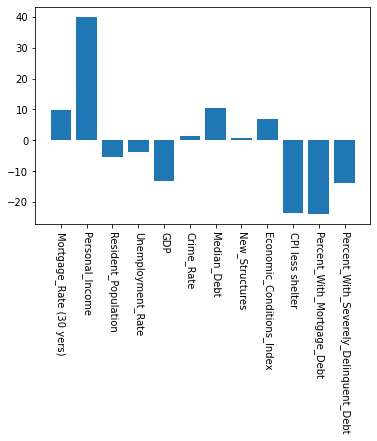

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,1/1/2018,258.569765,4.03,100236,4726.314,3.1,562155.764,690.8945,34.80%,373953,0.50%,933,5.02,240.742
1,2/1/2018,260.248492,4.33,104921,4731.803,3.0,591945.456,690.8945,34.80%,373953,0.50%,1366,4.95,240.742
2,3/1/2018,261.822888,4.44,104921,4731.803,2.9,591945.456,690.8945,34.80%,373953,0.50%,2049,4.13,242.950
3,4/1/2018,261.714329,4.47,104921,4731.803,2.6,591945.456,690.8945,34.40%,373237,0.40%,1783,4.11,242.950
4,5/1/2018,263.664436,4.59,104921,4731.803,2.4,591945.456,690.8945,34.40%,373237,0.40%,1127,4.13,244.644
5,6/1/2018,264.833339,4.57,104921,4731.803,3.0,591945.456,690.8945,34.40%,373237,0.40%,1070,4.19,244.644
6,7/1/2018,266.780509,4.53,104921,4731.803,3.0,591945.456,690.8945,34.50%,374017,0.40%,996,4.13,245.933
7,8/1/2018,267.559797,4.55,104921,4731.803,2.9,591945.456,690.8945,34.50%,374017,0.40%,1736,3.70,245.933
8,9/1/2018,268.832899,4.63,104921,4731.803,2.6,591945.456,690.8945,34.50%,374017,0.40%,742,3.42,248.281
9,10/1/2018,267.767739,4.83,104921,4731.803,2.7,591945.456,690.8945,33.90%,374849,0.40%,1262,3.45,248.281


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,258.569765,4.03,100236,4726.314,3.1,562155.764,690.8945,373953,933,5.02,240.742,34.8,0.5
1,2/1/2018,260.248492,4.33,104921,4731.803,3.0,591945.456,690.8945,373953,1366,4.95,240.742,34.8,0.5
2,3/1/2018,261.822888,4.44,104921,4731.803,2.9,591945.456,690.8945,373953,2049,4.13,242.950,34.8,0.5
3,4/1/2018,261.714329,4.47,104921,4731.803,2.6,591945.456,690.8945,373237,1783,4.11,242.950,34.4,0.4
4,5/1/2018,263.664436,4.59,104921,4731.803,2.4,591945.456,690.8945,373237,1127,4.13,244.644,34.4,0.4


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,100236,4726.314,3.1,562155.764,690.8945,373953,933,5.02,240.742,34.8,0.5
1,4.33,104921,4731.803,3.0,591945.456,690.8945,373953,1366,4.95,240.742,34.8,0.5
2,4.44,104921,4731.803,2.9,591945.456,690.8945,373953,2049,4.13,242.950,34.8,0.5
3,4.47,104921,4731.803,2.6,591945.456,690.8945,373237,1783,4.11,242.950,34.4,0.4
4,4.59,104921,4731.803,2.4,591945.456,690.8945,373237,1127,4.13,244.644,34.4,0.4
5,4.57,104921,4731.803,3.0,591945.456,690.8945,373237,1070,4.19,244.644,34.4,0.4
6,4.53,104921,4731.803,3.0,591945.456,690.8945,374017,996,4.13,245.933,34.5,0.4
7,4.55,104921,4731.803,2.9,591945.456,690.8945,374017,1736,3.70,245.933,34.5,0.4
8,4.63,104921,4731.803,2.6,591945.456,690.8945,374017,742,3.42,248.281,34.5,0.4
9,4.83,104921,4731.803,2.7,591945.456,690.8945,374849,1262,3.45,248.281,33.9,0.4


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,0.220289,4.0300,4.4625,4.5600,4.6325,4.8700
Personal_Income,12.0,104530.583333,1352.443006,100236.0000,104921.0000,104921.0000,104921.0000,104921.0000
Resident_Population,12.0,4731.345583,1.584538,4726.3140,4731.8030,4731.8030,4731.8030,4731.8030
Unemployment_Rate,12.0,2.791667,0.219331,2.4000,2.6000,2.8000,3.0000,3.1000
GDP,12.0,589462.981667,8599.543348,562155.7640,591945.4560,591945.4560,591945.4560,591945.4560
Crime_Rate,12.0,690.894500,0.000000,690.8945,690.8945,690.8945,690.8945,690.8945
Median_Debt,12.0,374014.000000,596.508935,373237.0000,373774.0000,373985.0000,374225.0000,374849.0000
New_Structures,12.0,1396.750000,632.554292,742.0000,980.2500,1194.5000,1747.7500,2921.0000
Economic_Conditions_Index,12.0,3.968333,0.612800,3.0000,3.4425,4.1200,4.1450,5.0200
CPI less shelter,12.0,245.081500,2.786106,240.7420,242.9500,245.2885,247.9390,248.2810


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.086311,1.384492,-1.301891,1.999594,-1.146172,-0.690339,0.178295,0.567338,1.624617,-1.539338,-0.961685
1,-0.423295,2.449132,1.413356,-1.346179,2.349892,-1.146172,-0.690339,1.094460,0.546566,1.624617,-1.539338,-0.961685
2,-0.317299,2.449132,1.413356,-1.390467,2.349892,-1.146172,-0.690339,2.539588,0.303245,1.759425,-1.539338,-0.961685
3,-0.288391,2.449132,1.413356,-1.523331,2.349892,-1.146172,-0.726651,1.976771,0.297311,1.759425,-1.708786,-1.004193
4,-0.172759,2.449132,1.413356,-1.611906,2.349892,-1.146172,-0.726651,0.588771,0.303245,1.862851,-1.708786,-1.004193
5,-0.192031,2.449132,1.413356,-1.346179,2.349892,-1.146172,-0.726651,0.468167,0.321049,1.862851,-1.708786,-1.004193
6,-0.230575,2.449132,1.413356,-1.346179,2.349892,-1.146172,-0.687094,0.311594,0.303245,1.941550,-1.666424,-1.004193
7,-0.211303,2.449132,1.413356,-1.390467,2.349892,-1.146172,-0.687094,1.877326,0.175650,1.941550,-1.666424,-1.004193
8,-0.134215,2.449132,1.413356,-1.523331,2.349892,-1.146172,-0.687094,-0.225833,0.092565,2.084905,-1.666424,-1.004193
9,0.058504,2.449132,1.413356,-1.479043,2.349892,-1.146172,-0.644900,0.874411,0.101467,2.084905,-1.920597,-1.004193


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[236.89022704 250.30360383 247.93595146 252.45374836 250.27354164
 249.0852181  245.99247441 246.86882983 242.27334985 251.57238068
 251.54804367 252.52676128]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,236.890227
1,250.303604
2,247.935951
3,252.453748
4,250.273542
5,249.085218
6,245.992474
7,246.868830
8,242.273350
9,251.572381
